### LABORATORIO #2 

- Diego Duarte
- Paula Barilals

Datos de entrenamiento: 60000
Datos de prueba: 10000
Forma de X_entreno: (60000, 28, 28)
Forma de X_prueba: (10000, 28, 28)


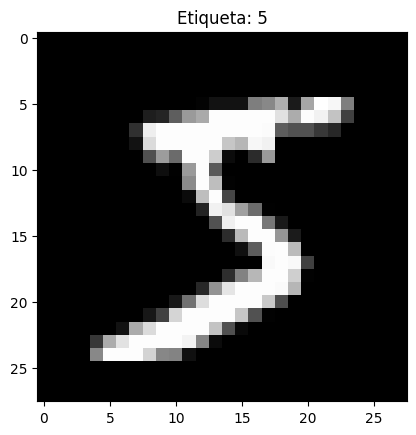

In [2]:
import numpy as np
import tensorflow as tf

(X_entreno, y_entreno), (X_prueba, y_prueba) = tf.keras.datasets.mnist.load_data()

# Imprimir cantidad de datos de entrenamiento y prueba
print(f"Datos de entrenamiento: {X_entreno.shape[0]}")
print(f"Datos de prueba: {X_prueba.shape[0]}")

# Mostrar forma de los datos
print(f"Forma de X_entreno: {X_entreno.shape}")
print(f"Forma de X_prueba: {X_prueba.shape}")

# Preprocesamiento: normalizar imágenes a rango [0, 1]
X_entreno = X_entreno.astype('float32') / 255.0
X_prueba = X_prueba.astype('float32') / 255.0

# Convertir etiquetas a one-hot encoding
y_entreno = tf.keras.utils.to_categorical(y_entreno, 10)
y_prueba = tf.keras.utils.to_categorical(y_prueba, 10)

# ejemplo de imagen y etiqueta
import matplotlib.pyplot as plt
plt.imshow(X_entreno[0], cmap='gray')
plt.title(f"Etiqueta: {np.argmax(y_entreno[0])}")
plt.show()

### 1. Modificación del Ancho de la Red (8 puntos)
- Modifique el tamaño de la capa escondida a 200 neuronas.
- Experimente con diferentes tamaños de capa escondida (50, 100, 300, 500) y determine
cuál ofrece el mejor rendimiento

1. ¿Cómo cambia la precisión de validación del modelo?

2. ¿Cuánto tiempo tarda el algoritmo en entrenar?



In [4]:
from tensorflow import keras
from tensorflow.keras import layers

# crear y entrenar el modelo con diferente tamaño de capa escondida
def entrenar_modelo(hidden_units):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=128, 
                        validation_data=(X_prueba, y_prueba), verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    print(f"Capa escondida: {hidden_units} neuronas")
    print(f"  Precisión de validación final: {val_acc:.4f}")
    print(f"  Pérdida de validación final: {val_loss:.4f}")
    print("-" * 40)
    return val_acc, val_loss

# Probar diferentes tamaños de capa escondida
for unidades in [50, 100, 200, 300, 500]:
    entrenar_modelo(unidades)


Capa escondida: 50 neuronas
  Precisión de validación final: 0.9614
  Pérdida de validación final: 0.1261
----------------------------------------
Capa escondida: 100 neuronas
  Precisión de validación final: 0.9704
  Pérdida de validación final: 0.1000
----------------------------------------
Capa escondida: 200 neuronas
  Precisión de validación final: 0.9783
  Pérdida de validación final: 0.0782
----------------------------------------
Capa escondida: 300 neuronas
  Precisión de validación final: 0.9781
  Pérdida de validación final: 0.0735
----------------------------------------
Capa escondida: 500 neuronas
  Precisión de validación final: 0.9778
  Pérdida de validación final: 0.0647
----------------------------------------


### 2. Modificación de la Profundidad de la Red
Agregue una capa escondida adicional al modelo.
- Documente cuidadosamente las dimensiones de los pesos y sesgos
- Compare la precisión de validación con el modelo original

1. Analice el impacto en el tiempo de ejecución
2. Explique los cambios necesarios en el código para implementar esta modificación

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

# Modelo con dos capas escondidas
def entrenar_modelo2c(hidden_units1, hidden_units2):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units1, activation='relu'),
        layers.Dense(hidden_units2, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=128,
                        validation_data=(X_prueba, y_prueba), verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    print(f"Capas escondidas: {hidden_units1} y {hidden_units2} neuronas")
    print(f"  Precisión de validación final: {val_acc:.4f}")
    print(f"  Pérdida de validación final: {val_loss:.4f}")
    print("-" * 40)
    # Dimensiones de pesos y sesgos
    for i, layer in enumerate(model.layers):
        if hasattr(layer, 'weights'):
            pesos = layer.get_weights()[0].shape if layer.get_weights() else None
            sesgos = layer.get_weights()[1].shape if layer.get_weights() else None
            print(f"Capa {i}: pesos {pesos}, sesgos {sesgos}")
    print("-" * 40)
    return val_acc, val_loss

# prueba con 200 y 100 neuronas
entrenar_modelo2c(200, 100)

Capas escondidas: 200 y 100 neuronas
  Precisión de validación final: 0.9761
  Pérdida de validación final: 0.0721
----------------------------------------
Capa 0: pesos None, sesgos None
Capa 1: pesos (784, 200), sesgos (200,)
Capa 2: pesos (200, 100), sesgos (100,)
Capa 3: pesos (100, 10), sesgos (10,)
----------------------------------------


(0.9761000275611877, 0.07214768975973129)

### 3. Redes Profundas
Experimente con arquitecturas más profundas, llegando hasta 5 capas escondidas.
- Ajuste el ancho de cada capa según considere conveniente
- Documente la precisión de validación para cada configuración
- Analice la relación entre profundidad y tiempo de ejecución
- Identifique posibles problemas de desvanecimiento del gradiente

In [6]:
import time

# Función para entrenar modelos con hasta 5 capas escondidas
def entrenar_red(hidden_units_list):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    for units in hidden_units_list:
        model.add(layers.Dense(units, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    start = time.time()
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=128,
                        validation_data=(X_prueba, y_prueba), verbose=0)
    end = time.time()
    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    print(f"Arquitectura: {hidden_units_list} neuronas por capa")
    print(f"  Precisión de validación final: {val_acc:.4f}")
    print(f"  Pérdida de validación final: {val_loss:.4f}")
    print(f"  Tiempo de entrenamiento: {end - start:.2f} segundos")
    print("-" * 40)
    # dimensiones de pesos y sesgos
    for i, layer in enumerate(model.layers):
        if hasattr(layer, 'weights') and layer.get_weights():
            pesos = layer.get_weights()[0].shape
            sesgos = layer.get_weights()[1].shape
            print(f"Capa {i}: pesos {pesos}, sesgos {sesgos}")
    print("-" * 40)
    return val_acc, val_loss

# arquitecturas profundas
arquitecturas = [
    [100],
    [200, 100],
    [200, 150, 100],
    [300, 200, 150, 100],
    [500, 400, 300, 200, 100]
]

for config in arquitecturas:
    entrenar_red(config)
    

Arquitectura: [100] neuronas por capa
  Precisión de validación final: 0.9698
  Pérdida de validación final: 0.0970
  Tiempo de entrenamiento: 17.32 segundos
----------------------------------------
Capa 1: pesos (784, 100), sesgos (100,)
Capa 2: pesos (100, 10), sesgos (10,)
----------------------------------------
Arquitectura: [200, 100] neuronas por capa
  Precisión de validación final: 0.9735
  Pérdida de validación final: 0.0805
  Tiempo de entrenamiento: 20.84 segundos
----------------------------------------
Capa 1: pesos (784, 200), sesgos (200,)
Capa 2: pesos (200, 100), sesgos (100,)
Capa 3: pesos (100, 10), sesgos (10,)
----------------------------------------
Arquitectura: [200, 150, 100] neuronas por capa
  Precisión de validación final: 0.9731
  Pérdida de validación final: 0.0893
  Tiempo de entrenamiento: 24.25 segundos
----------------------------------------
Capa 1: pesos (784, 200), sesgos (200,)
Capa 2: pesos (200, 150), sesgos (150,)
Capa 3: pesos (150, 100), sesg

### 4. Funciones de Activación I 
Aplique la función de activación sigmoidal a todas las capas.
- Compare el rendimiento con las activaciones originales
- Analice el impacto en la velocidad de convergencia

In [9]:
# Función para entrenar el modelo usando activación ReLU
def entrenar_relu(hidden_units):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    start = time.time()
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=128,
                        validation_data=(X_prueba, y_prueba), verbose=0)
    end = time.time()
    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    print(f"[ReLU] {hidden_units} neuronas - Precisión: {val_acc:.4f} - Pérdida: {val_loss:.4f} - Tiempo: {end-start:.2f}s")
    return val_acc, val_loss, end-start

# Función para entrenar el modelo usando activación sigmoidal
def entrenar_sigmoide(hidden_units):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units, activation='sigmoid'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    start = time.time()
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=128,
                        validation_data=(X_prueba, y_prueba), verbose=0)
    end = time.time()
    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    print(f"[Sigmoide] {hidden_units} neuronas - Precisión: {val_acc:.4f} - Pérdida: {val_loss:.4f} - Tiempo: {end-start:.2f}s")
    return val_acc, val_loss, end-start

# Comparar rendimiento y velocidad de convergencia
for unidades in [50, 100, 200, 300, 500]:
    print(f"\nComparando para {unidades} neuronas en la capa escondida:")
    entrenar_relu(unidades)
    entrenar_sigmoide(unidades)
    


Comparando para 50 neuronas en la capa escondida:
[ReLU] 50 neuronas - Precisión: 0.9610 - Pérdida: 0.1271 - Tiempo: 13.20s
[Sigmoide] 50 neuronas - Precisión: 0.9465 - Pérdida: 0.1874 - Tiempo: 12.77s

Comparando para 100 neuronas en la capa escondida:
[ReLU] 100 neuronas - Precisión: 0.9697 - Pérdida: 0.1017 - Tiempo: 15.14s
[Sigmoide] 100 neuronas - Precisión: 0.9534 - Pérdida: 0.1577 - Tiempo: 19.65s

Comparando para 200 neuronas en la capa escondida:
[ReLU] 200 neuronas - Precisión: 0.9752 - Pérdida: 0.0765 - Tiempo: 20.19s
[Sigmoide] 200 neuronas - Precisión: 0.9590 - Pérdida: 0.1370 - Tiempo: 19.70s

Comparando para 300 neuronas en la capa escondida:
[ReLU] 300 neuronas - Precisión: 0.9756 - Pérdida: 0.0770 - Tiempo: 19.09s
[Sigmoide] 300 neuronas - Precisión: 0.9607 - Pérdida: 0.1277 - Tiempo: 19.26s

Comparando para 500 neuronas en la capa escondida:
[ReLU] 500 neuronas - Precisión: 0.9798 - Pérdida: 0.0645 - Tiempo: 22.06s
[Sigmoide] 500 neuronas - Precisión: 0.9635 - Pérdid

### 5. Funciones de Activación II 
Aplique ReLU a la primera capa escondida y tanh a la segunda
- Compare el rendimiento con las configuraciones anteriores
- Explique las ventajas y desventajas de cada función de activación

In [11]:
# Modelo con ReLU en la primera capa escondida y tanh en la segunda
def ReLU_tanh(hidden_units1, hidden_units2):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units1, activation='relu'),
        layers.Dense(hidden_units2, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    start = time.time()
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=128,
                        validation_data=(X_prueba, y_prueba), verbose=0)
    end = time.time()
    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    print(f"[ReLU-Tanh] {hidden_units1} y {hidden_units2} neuronas - Precisión: {val_acc:.4f} - Pérdida: {val_loss:.4f} - Tiempo: {end-start:.2f}s")
    print("-" * 40)
    return val_acc, val_loss, end-start

# Comparar con diferentes cantidades de neuronas
configs = [(200, 100), (300, 200), (500, 300), (500, 500)]
for h1, h2 in configs:
    print(f"\nComparando para {h1} y {h2} neuronas:")
    ReLU_tanh(h1, h2)


Comparando para 200 y 100 neuronas:
[ReLU-Tanh] 200 y 100 neuronas - Precisión: 0.9793 - Pérdida: 0.0700 - Tiempo: 23.49s
----------------------------------------

Comparando para 300 y 200 neuronas:
[ReLU-Tanh] 300 y 200 neuronas - Precisión: 0.9780 - Pérdida: 0.0721 - Tiempo: 22.23s
----------------------------------------

Comparando para 500 y 300 neuronas:
[ReLU-Tanh] 500 y 300 neuronas - Precisión: 0.9770 - Pérdida: 0.0780 - Tiempo: 30.05s
----------------------------------------

Comparando para 500 y 500 neuronas:
[ReLU-Tanh] 500 y 500 neuronas - Precisión: 0.9778 - Pérdida: 0.0837 - Tiempo: 26.26s
----------------------------------------


### 6. Tamaño de Batch Grande
Modifique el tamaño de batch a 10,000.
- Documente el cambio en el tiempo de entrenamiento
- Analice el impacto en la precisión del modelo
- Explique teóricamente por qué se observan estos cambios

In [13]:
def entrenar_batch_grande(hidden_units, batch_size=10000):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    start = time.time()
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=batch_size,
                        validation_data=(X_prueba, y_prueba), verbose=0)
    end = time.time()
    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    print(f"Batch size: {batch_size} | Neuronas: {hidden_units}")
    print(f"  Precisión de validación final: {val_acc:.4f}")
    print(f"  Pérdida de validación final: {val_loss:.4f}")
    print(f"  Tiempo de entrenamiento: {end - start:.2f} segundos")
    print("-" * 40)
    return val_acc, val_loss, end-start

# 200 neuronas y batch grande
entrenar_batch_grande(200, batch_size = 10000)
# 500 neuronas y batch grande
entrenar_batch_grande(500, batch_size = 10000)
# 1000 neuronas y batch grande
entrenar_batch_grande(1000, batch_size = 10000)

Batch size: 10000 | Neuronas: 200
  Precisión de validación final: 0.8937
  Pérdida de validación final: 0.3997
  Tiempo de entrenamiento: 5.23 segundos
----------------------------------------
Batch size: 10000 | Neuronas: 500
  Precisión de validación final: 0.9119
  Pérdida de validación final: 0.3127
  Tiempo de entrenamiento: 30.44 segundos
----------------------------------------
Batch size: 10000 | Neuronas: 1000
  Precisión de validación final: 0.9203
  Pérdida de validación final: 0.2763
  Tiempo de entrenamiento: 11.36 segundos
----------------------------------------


(0.9203000068664551, 0.27630770206451416, 11.35644245147705)

### 7. Descenso de Gradiente Estocástico (SGD)
Ajuste el tamaño de batch a 1 (SGD puro).
- Compare el tiempo de ejecución con configuraciones anteriores
- Analice la estabilidad y precisión del entrenamiento
- Explique si los resultados son coherentes con la teoría

In [ ]:
def entrenar_sgd(hidden_units, batch_size=1):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    start = time.time()
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=batch_size,
                        validation_data=(X_prueba, y_prueba), verbose=0)
    end = time.time()
    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    print(f"Batch size: {batch_size} | Neuronas: {hidden_units}")
    print(f"  Precisión de validación final: {val_acc:.4f}")
    print(f"  Pérdida de validación final: {val_loss:.4f}")
    print(f"  Tiempo de entrenamiento: {end - start:.2f} segundos")
    print("-" * 40)
    return val_acc, val_loss, end-start

# 200 neuronas y batch=1 (SGD puro)
entrenar_sgd(200, batch_size = 1)
# 500 neuronas y batch=1 (SGD puro)
entrenar_sgd(500, batch_size = 1)
# 1000 neuronas y batch=1 (SGD puro)
entrenar_sgd(1000, batch_size = 1)


### 8. Tasa de Aprendizaje Baja
Modifique la tasa de aprendizaje a 0.0001.
- Documente el impacto en la convergencia del modelo
- Analice si el modelo alcanza mejor precisión o se queda atrapado en mínimos locales

In [ ]:
def entrenar_lr_bajo(hidden_units, lr=0.0001):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    start = time.time()
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=128,
                        validation_data=(X_prueba, y_prueba), verbose=0)
    end = time.time()
    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    print(f"Tasa de aprendizaje: {lr} | Neuronas: {hidden_units}")
    print(f"  Precisión de validación final: {val_acc:.4f}")
    print(f"  Pérdida de validación final: {val_loss:.4f}")
    print(f"  Tiempo de entrenamiento: {end - start:.2f} segundos")
    print("-" * 40)
    return val_acc, val_loss, end-start

# 200 neuronas y tasa de aprendizaje baja
entrenar_lr_bajo(200, lr = 0.0001)
# 500 neuronas y tasa de aprendizaje baja
entrenar_lr_bajo(500, lr = 0.0001)
# 1000 neuronas y tasa de aprendizaje baja
entrenar_lr_bajo(1000, lr = 0.0001)


### 9. Tasa de Aprendizaje Alta 
Ajuste la tasa de aprendizaje a 0.02.
- Documente el impacto en la estabilidad del entrenamiento
- Analice si se produce divergencia o mejora en la velocidad de convergencia

In [ ]:

def entrenar_lr_alta(hidden_units, lr=0.02):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(hidden_units, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    start = time.time()
    history = model.fit(X_entreno, y_entreno, epochs=5, batch_size=128,
                        validation_data=(X_prueba, y_prueba), verbose=0)
    end = time.time()
    val_acc = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    print(f"Tasa de aprendizaje: {lr} | Neuronas: {hidden_units}")
    print(f"  Precisión de validación final: {val_acc:.4f}")
    print(f"  Pérdida de validación final: {val_loss:.4f}")
    print(f"  Tiempo de entrenamiento: {end - start:.2f} segundos")
    print("-" * 40)
    return val_acc, val_loss, end-start

# 200 neuronas y tasa de aprendizaje alta
entrenar_lr_alta(200, lr=0.02)
# 500 neuronas y tasa de aprendizaje alta
entrenar_lr_alta(500, lr=0.02)
# 1000 neuronas y tasa de aprendizaje alta
entrenar_lr_alta(1000, lr=0.02)